In [2]:
# Load filter2D + dilate overlay
from pynq import Overlay
bareHDMI = Overlay("/usr/local/lib/python3.6/dist-packages/"
               "pynq_cv/overlays/xv2Filter2DDilate.bit")
import pynq_cv.overlays.xv2Filter2DDilate as xv2

# load xlnk memory manager
from pynq import Xlnk
Xlnk.set_allocator_library("/usr/local/lib/python3.6/dist-packages/"
                           "pynq_cv/overlays/xv2Filter2DDilate.so")

mem_manager = Xlnk()

hdmi_in = bareHDMI.video.hdmi_in
hdmi_out = bareHDMI.video.hdmi_out

In [3]:
import numpy as np
import time
import cv2
import PIL.Image

in_img = cv2.imread('./a_photo_but_smaller.jpg', flags=0)
print(in_img.shape)
image = PIL.Image.fromarray(in_img)
image

(1037, 1383)


In [15]:
# Sobel vertical filter
kernelF = np.array([[1.0,0.0,-1.0],[2.0,0.0,-2.0],[1.0,0.0,-1.0]],np.float32)

start = time.time()
out_img = cv2.filter2D(in_img, -1, kernelF)
end = time.time()
print("FPS: %0.2f" % (1 / (end - start)))

FPS: 7.03


In [16]:
image = PIL.Image.fromarray(out_img)
image

In [17]:
# copy to buffer
import pynq.buffer as pb
import numpy as np

xv2_in = pb.allocate(in_img.shape, dtype=np.uint8)
xv2_out = pb.allocate(in_img.shape, dtype=np.uint8)

y, x = xv2_in.shape

for i in range(y):
    for j in range(x):
        xv2_in[i,j] = in_img[i,j]

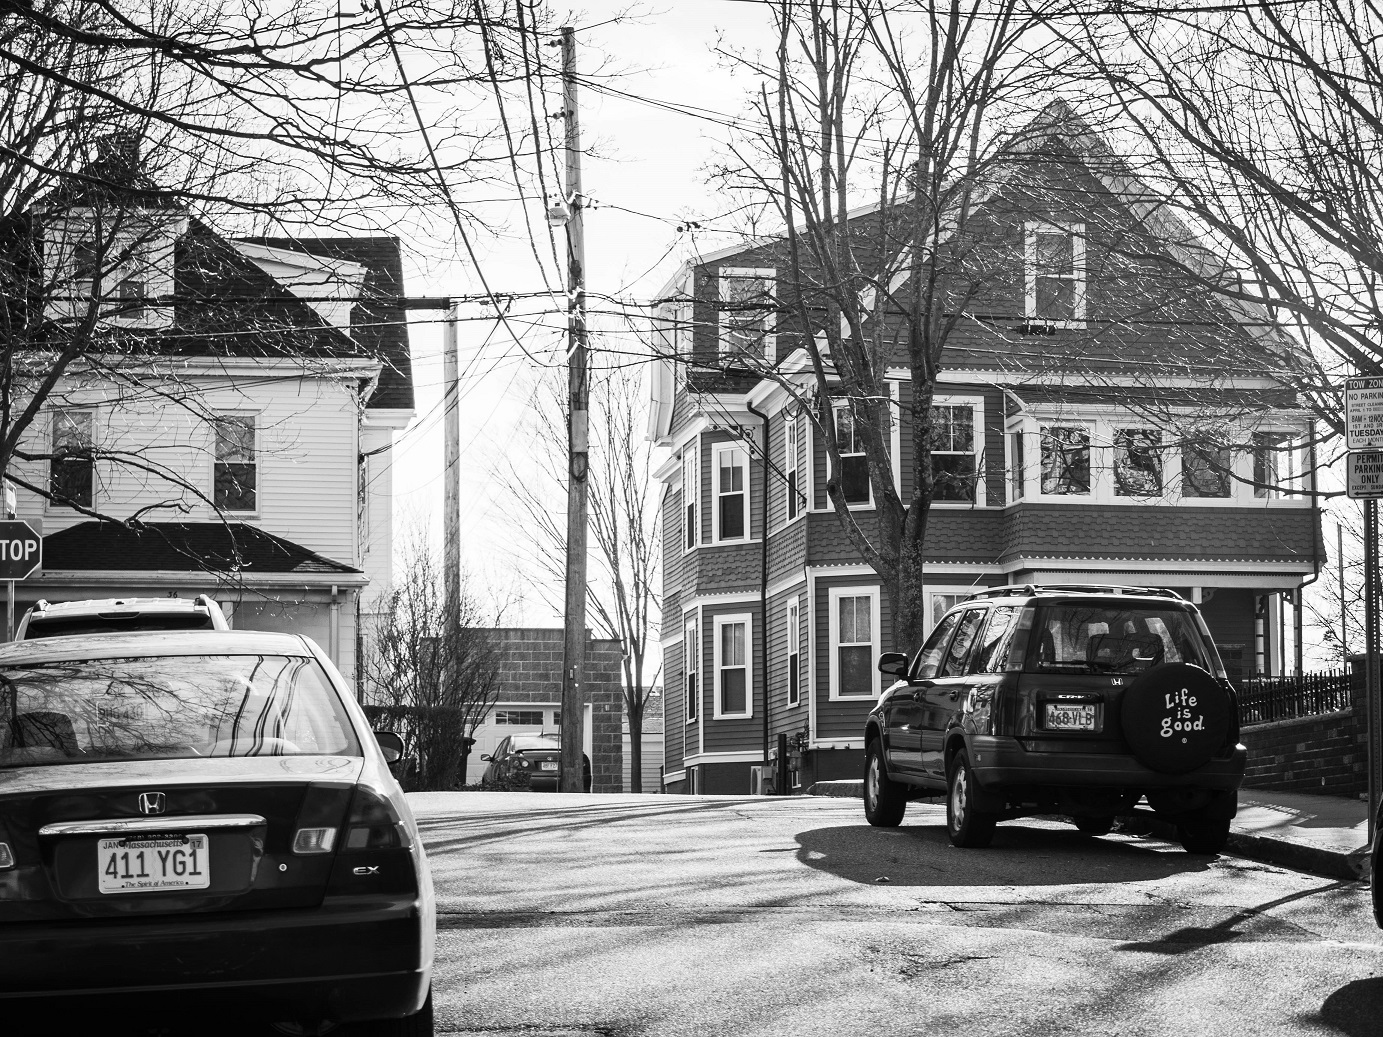

In [18]:
image = PIL.Image.fromarray(xv2_in)
image

In [19]:
import pynq_cv.overlays.xv2Filter2DDilate as xv2
import numpy as np
import pynq.buffer as pb

kernel_g = np.array([[1.0,0.0,-1.0],[2.0,0.0,-2.0],[1.0,0.0,-1.0]],np.float32)

xv2_start=time.time()
xv2.filter2D(xv2_in, -1, kernel_g, dst=xv2_out, borderType=cv2.BORDER_CONSTANT)
xv2_end=time.time()
print("FPS: %0.2f" % (1 / (xv2_end - xv2_start)))

FPS: 60.36


In [20]:
import PIL.Image
image = PIL.Image.fromarray(xv2_out)
image

In [22]:
# calculate speed up
ps_fps = 1 / (end - start)
pl_fps = 1 / (xv2_end - xv2_start)

speed_up = pl_fps / ps_fps
print("Speed up of %0.2fX achieved by PL" % speed_up)

Speed up of 8.58X achieved by PL
